In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [ ]:
import json

def load_processed_data():
    with open('../results/full/similarity_ST.jsonl', 'r') as file:
        data = [json.loads(line) for line in file.readlines()]
    return data

data = load_processed_data()

In [ ]:
scores = [item['similarity_scores'] for item in data]

In [ ]:
scores_all = [score for item in scores for score in item]

In [ ]:
scores_avg = [np.mean(score) for score in scores]

In [ ]:
scores_all_df = pd.DataFrame(scores_all, columns=['score'])
scores_all_df.info()
scores_all_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78316 entries, 0 to 78315
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   78316 non-null  float64
dtypes: float64(1)
memory usage: 612.0 KB


,score
count,78316.000000
mean,0.674484
std,0.256680
min,-0.126963
25%,0.522821
50%,0.763453
75%,0.873337
max,1.000000


Text(0.5, 1.0, 'Boxplot of score')

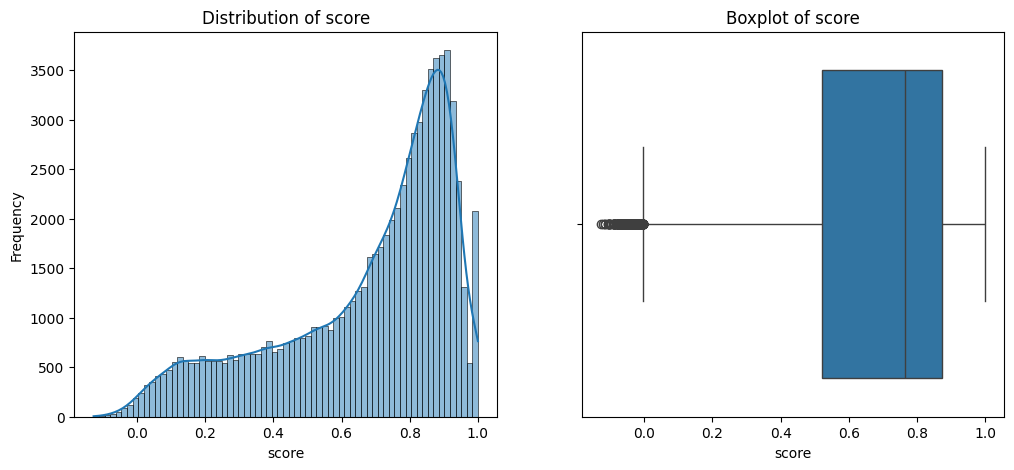

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# 히스토그램
sns.histplot(data=scores_all_df, x='score', kde=True, ax=ax[0])
ax[0].set_xlabel('score')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Distribution of score')

# Boxplot 그리기
sns.boxplot(data=scores_all_df, x='score', ax=ax[1])
ax[1].set_xlabel('score')
ax[1].set_title('Boxplot of score')

Text(0.5, 1.0, 'Boxplot of similarity_score')

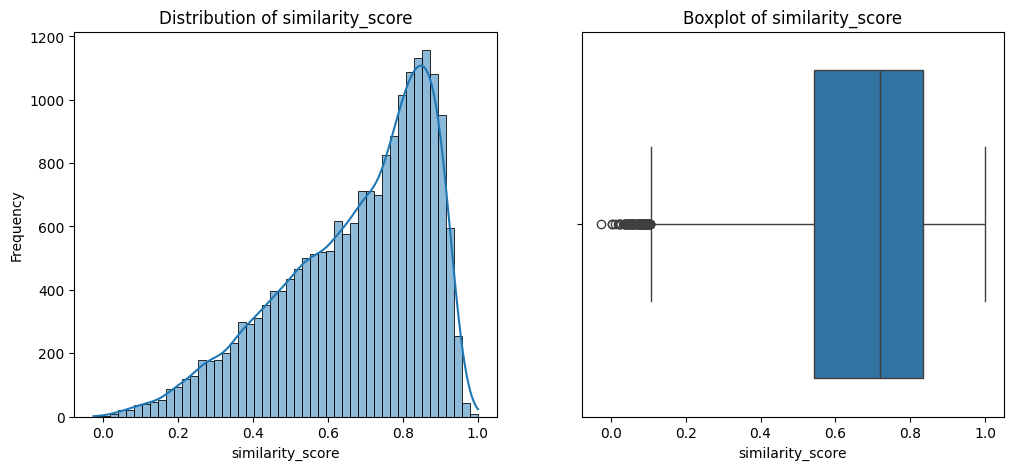

In [ ]:
scores_avg_df = pd.DataFrame(scores_avg, columns=['similarity_score'])
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# 히스토그램
sns.histplot(data=scores_avg_df, x='similarity_score', kde=True, ax=ax[0])
ax[0].set_xlabel('similarity_score')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Distribution of similarity_score')

# Boxplot 그리기
sns.boxplot(data=scores_avg_df, x='similarity_score', ax=ax[1])
ax[1].set_xlabel('similarity_score')
ax[1].set_title('Boxplot of similarity_score')

Text(0.5, 1.0, 'Distribution of average score')

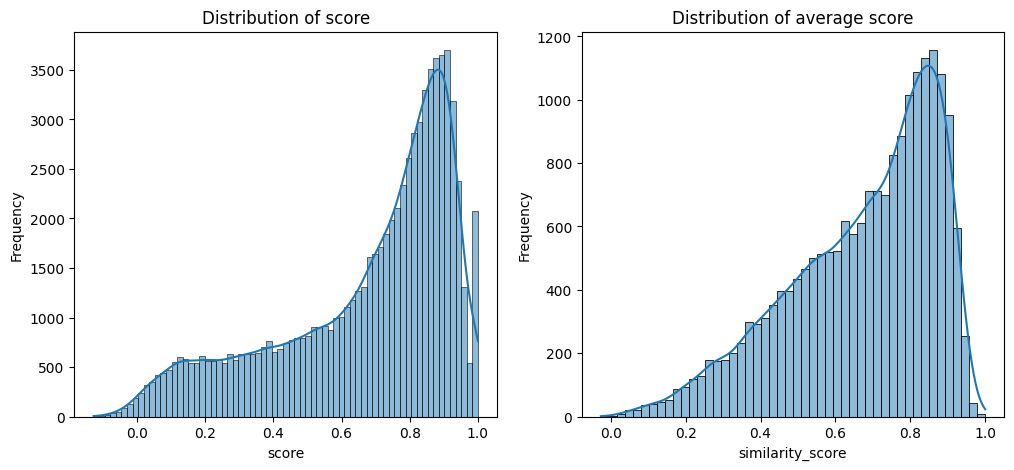

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# 히스토그램
sns.histplot(data=scores_all_df, x='score', kde=True, ax=ax[0])
ax[0].set_xlabel('score')
ax[0].set_ylabel('Frequency')
ax[0].set_title('Distribution of score')

# 히스토그램
sns.histplot(data=scores_avg_df, x='similarity_score', kde=True, ax=ax[1])
ax[1].set_xlabel('similarity_score')
ax[1].set_ylabel('Frequency')
ax[1].set_title('Distribution of average score')


In [ ]:
score_variance = [np.var(score) for score in scores]
print(score_variance)

[0.04310201238484729, 0.0006843275128955995, 0.00029707631406838964, 0.0059759225318185005, 0.0029896532521735963, 0.015854839833917778, 0.005337696136161751, 0.003580678855855224, 0.0007419629949818596, 0.006417865061947081, 0.014532883007247532, 0.004426867340034557, 0.00669235956822245, 0.0014551734014434103, 0.00810547505670467, 0.000538787037096311, 0.006756426263687443, 0.004726375835115704, 0.0006554972133858694, 0.0012194315345386286, 0.00183789876305962, 0.01763276699987304, 0.0008521375615142546, 0.016215185383542774, 0.002146643270377835, 0.1516718303435445, 0.006516913177360084, 0.005577218492867075, 0.014201058637911324, 0.0005881359758756581, 0.005079864361898556, 0.0057748134576509624, 0.005879110789426489, 0.058478463861577346, 0.002524164366613846, 0.004365853329839631, 0.013336953682041297, 0.002043900638331264, 0.0036745546085414915, 0.0519198042601034, 0.02550119706409948, 0.0027282573340299265, 0.13274813391263524, 0.050471122175569316, 0.00045302914808775796, 0.10

In [ ]:
# Create a new DataFrame combining score_variance and scores_avg
combined_df = pd.DataFrame({
    'score_avg': scores_avg,
    'score_variance': score_variance
})

# Display the combined DataFrame
combined_df.info()
combined_df.describe()
combined_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19579 entries, 0 to 19578
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   score_avg       19579 non-null  float64
 1   score_variance  19579 non-null  float64
dtypes: float64(2)
memory usage: 306.0 KB


,score_avg,score_variance
0,0.521682,0.043102
1,0.922930,0.000684
2,0.881101,0.000297
3,0.411265,0.005976
4,0.797823,0.002990


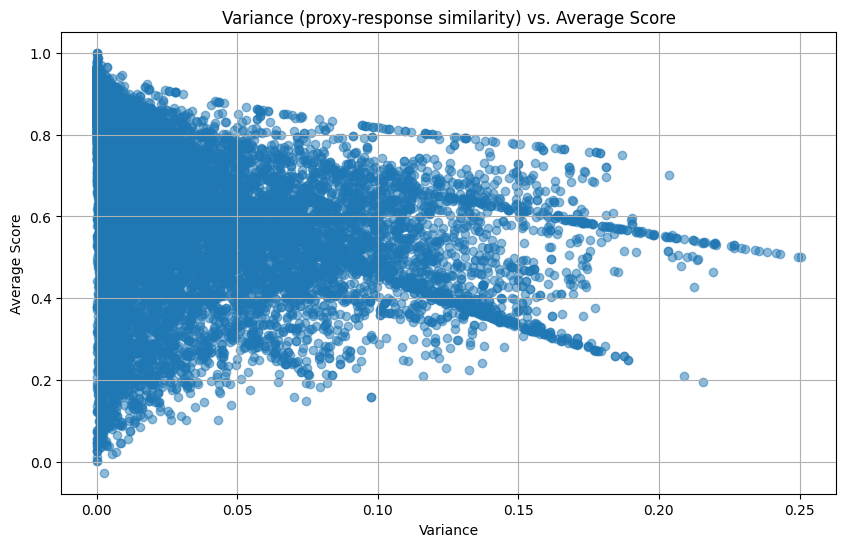

In [ ]:
# Scatter plot with variance on the x-axis and score_avg on the y-axis
plt.figure(figsize=(10, 6))
plt.scatter(combined_df['score_variance'], combined_df['score_avg'], alpha=0.5)
plt.xlabel('Variance')
plt.ylabel('Average Score')
plt.title('Variance (proxy-response similarity) vs. Average Score')
plt.grid(True)
plt.show()

In [ ]:
models_dict = {}
for item in data:
    models = item['models']
    for model in models:
        if model not in models_dict:
            models_dict[model] = 1
        else:
            models_dict[model] += 1

In [ ]:
models_dict

{'alpaca-7b': 5175,
 'llama-2-7b-chat': 5245,
 'wizardlm-13b': 5157,
 'wizardlm-7b': 5128,
 'llama-2-13b-chat': 5182,
 'llama-2-70b-chat': 5074,
 'ultralm-65b': 5110,
 'vicuna-33b': 5287,
 'starchat': 4959,
 'gpt-4': 4540,
 'falcon-40b-instruct': 5132,
 'mpt-30b-chat': 5186,
 'bard': 2051,
 'gpt-3.5-turbo': 4551,
 'ultralm-13b': 5187,
 'wizardlm-70b': 5069,
 'pythia-12b': 283}

In [ ]:
models_dict_score = {}
for item in data:
    models = item['models']
    for i in range(len(models)):
        if models[i] not in models_dict_score:
            models_dict_score[models[i]] = item['similarity_scores'][i]
        else:
            models_dict_score[models[i]] += item['similarity_scores'][i]

In [ ]:
models_dict_score

{'alpaca-7b': 3177.6371790929697,
 'llama-2-7b-chat': 3297.920120563358,
 'wizardlm-13b': 3628.1305172601715,
 'wizardlm-7b': 3380.945890150033,
 'llama-2-13b-chat': 3380.3421187517233,
 'llama-2-70b-chat': 3448.808861365542,
 'ultralm-65b': 3398.5038185259327,
 'vicuna-33b': 3760.446720160544,
 'starchat': 2960.2512258510105,
 'gpt-4': 3638.7218423914164,
 'falcon-40b-instruct': 2567.661495760549,
 'mpt-30b-chat': 3611.8860499463044,
 'bard': 1623.92004519701,
 'gpt-3.5-turbo': 3628.8444255543873,
 'ultralm-13b': 3499.4592601615004,
 'wizardlm-70b': 3628.1011377931572,
 'pythia-12b': 191.33432974852622}

In [ ]:
# Combine models_dict and models_dict_score into a DataFrame
combined_models_df = pd.DataFrame({
    'model': list(models_dict.keys()),
    'count': list(models_dict.values()),
    'total_score': list(models_dict_score.values())
})

# Display the combined DataFrame
combined_models_df.info()
combined_models_df.describe()
combined_models_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   model        17 non-null     object 
 1   count        17 non-null     int64  
 2   total_score  17 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 536.0+ bytes


,model,count,total_score
0,alpaca-7b,5175,3177.637179
1,llama-2-7b-chat,5245,3297.920121
2,wizardlm-13b,5157,3628.130517
3,wizardlm-7b,5128,3380.945890
4,llama-2-13b-chat,5182,3380.342119


In [ ]:
combined_models_df['average_score'] = combined_models_df['total_score'] / combined_models_df['count']
combined_models_df.head()

,model,count,total_score,average_score
0,alpaca-7b,5175,3177.637179,0.614036
1,llama-2-7b-chat,5245,3297.920121,0.628774
2,wizardlm-13b,5157,3628.130517,0.703535
3,wizardlm-7b,5128,3380.945890,0.659311
4,llama-2-13b-chat,5182,3380.342119,0.652324


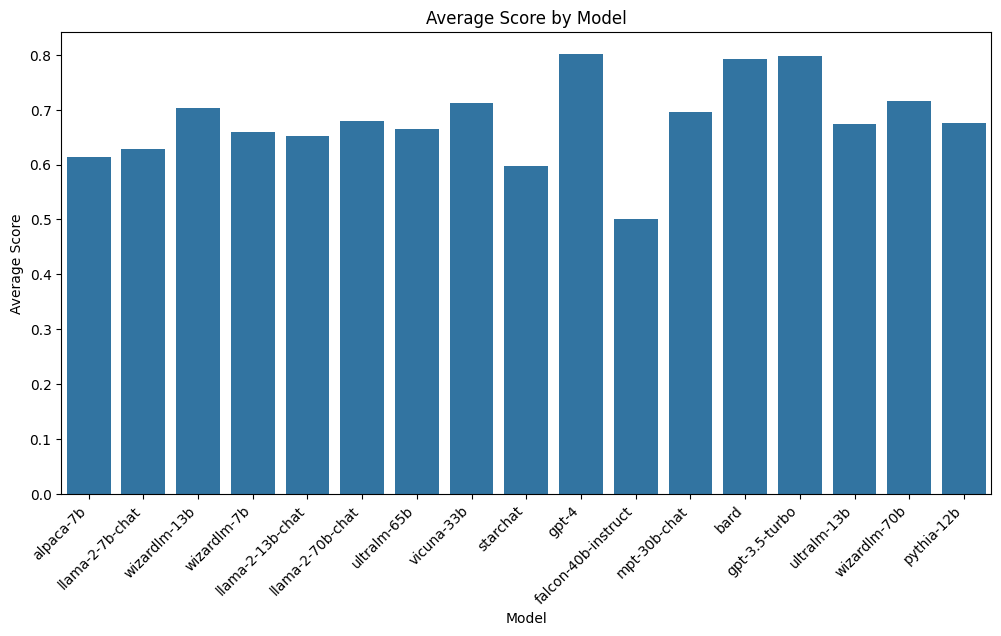

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=combined_models_df, x='model', y='average_score')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Model')
plt.ylabel('Average Score')
plt.title('Average Score by Model')
plt.show()

In [ ]:
# Sort the combined_models_df DataFrame by 'average_score' in ascending order and print the model names
sorted_models = combined_models_df.sort_values(by='average_score', ascending=False)
print(sorted_models['model'].tolist())

['gpt-4', 'gpt-3.5-turbo', 'bard', 'wizardlm-70b', 'vicuna-33b', 'wizardlm-13b', 'mpt-30b-chat', 'llama-2-70b-chat', 'pythia-12b', 'ultralm-13b', 'ultralm-65b', 'wizardlm-7b', 'llama-2-13b-chat', 'llama-2-7b-chat', 'alpaca-7b', 'starchat', 'falcon-40b-instruct']


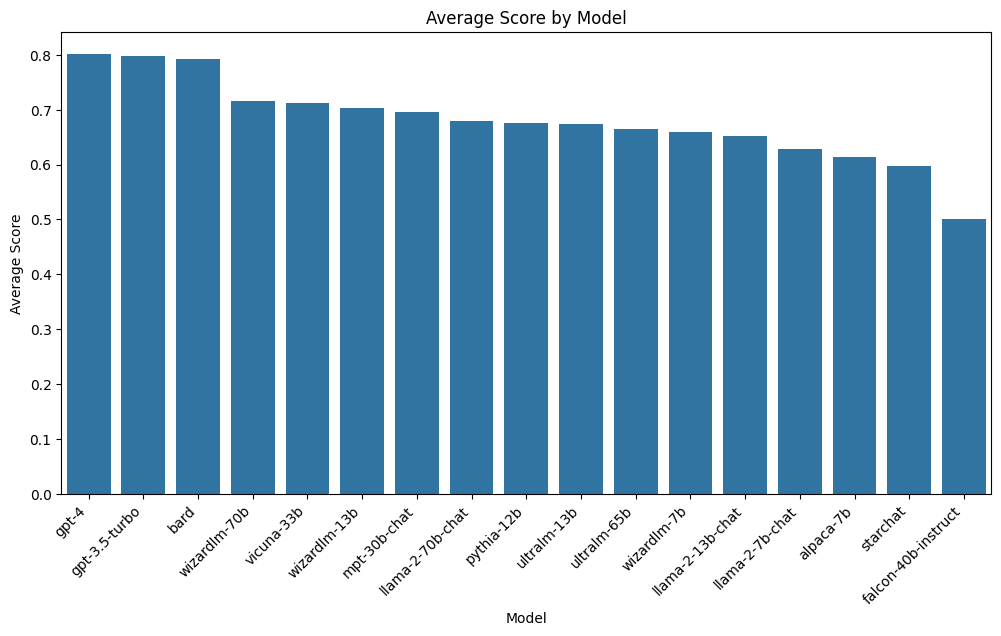

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=sorted_models, x='model', y='average_score')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Model')
plt.ylabel('Average Score')
plt.title('Average Score by Model')
plt.show()

In [ ]:
models_comb = {}
for item in data:
    models = item['models']
    models.sort()
    models_tuple = tuple(models)
    if models_tuple not in models_comb:
        models_comb[models_tuple] = 1
    else:
        models_comb[models_tuple] += 1

models_comb = dict(sorted(models_comb.items(), key=lambda item: item[1], reverse=True))
print(models_comb)

{('gpt-3.5-turbo', 'gpt-4', 'llama-2-7b-chat', 'vicuna-33b'): 6, ('llama-2-70b-chat', 'llama-2-7b-chat', 'ultralm-13b', 'wizardlm-13b'): 6, ('alpaca-7b', 'falcon-40b-instruct', 'mpt-30b-chat', 'vicuna-33b'): 6, ('alpaca-7b', 'falcon-40b-instruct', 'ultralm-65b', 'vicuna-33b'): 6, ('llama-2-13b-chat', 'ultralm-13b', 'vicuna-33b', 'wizardlm-70b'): 5, ('falcon-40b-instruct', 'gpt-3.5-turbo', 'gpt-4', 'ultralm-13b'): 5, ('falcon-40b-instruct', 'llama-2-70b-chat', 'vicuna-33b', 'wizardlm-7b'): 5, ('starchat', 'ultralm-13b', 'ultralm-65b', 'vicuna-33b'): 5, ('falcon-40b-instruct', 'llama-2-70b-chat', 'starchat', 'wizardlm-13b'): 4, ('gpt-3.5-turbo', 'mpt-30b-chat', 'ultralm-65b', 'vicuna-33b'): 4, ('alpaca-7b', 'llama-2-13b-chat', 'starchat', 'wizardlm-70b'): 4, ('llama-2-70b-chat', 'llama-2-7b-chat', 'mpt-30b-chat', 'ultralm-65b'): 4, ('gpt-4', 'mpt-30b-chat', 'wizardlm-13b', 'wizardlm-70b'): 4, ('falcon-40b-instruct', 'ultralm-65b', 'vicuna-33b', 'wizardlm-13b'): 4, ('alpaca-7b', 'llama-2-